<div class="alert alert-block alert-info"><font size="3"><b>Visualització gràfica de Múltiples variables amb el data set movies.dat</u></b></center></font>

Exercici 2

**1. Estudi de la relació entre variables**
 - 1.1. Adquisició i exploració inicial del Data Set
 - 1.2. Gràfics de dispersió
 - 1.3. Gràfic en Matriu
 - 1.4. Histogrames i Gràfics de Caixa
 
**2. Estadísitques descriptives:**
 - 2.1. Mitjana
 - 2.2. Variància 
 - 2.3. Desviació Estàndard
 - 2.4. Box plots

## <span style=color:darkblue>1. ESTUDI DE LA RELACIÓ ENTRE VARIABLES</span>
### <span style=color:darkblue>1.1. ADQUISICIÓ I EXPLORACIÓ INICIAL DEL DATA SET</span>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_table('movies.dat', sep='::', header=None, engine='python')

In [3]:
movies.shape #té 3883 registres

(3883, 3)

In [4]:
movies.head() #nom de les variables o atributs (10)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [118]:
# les dades en la columna '1' estan barrejades, s'han de separar
def get_film(x):
    film = x[:len(x)-7]
    return film
def get_year(y):
    year = y[len(y)-5:len(y)-1]
    return int(year)

# es crea un nou df per posar la informació re-endreçada
movies2 = pd.DataFrame()    
movies2["film"] = movies[1].apply(get_film)
movies2["year"] = movies[1].apply(get_year)

def generes(z): #posem els gèneres en format de llista
    g = z.split("|")
    return g

def num_g(a): #comptem el nombre de gèneres
    n = len(a)
    return n
movies2["genere"] = movies[2].apply(generes)
movies2["n_generes"] = movies2["genere"].apply(num_g) #nova variable per emmagatzemar el nombre de gèneres

In [119]:
movies2.head() #veiem com queda

,film,year,genere,n_generes
0,Toy Story,1995,"[Animation, Children's, Comedy]",3
1,Jumanji,1995,"[Adventure, Children's, Fantasy]",3
2,Grumpier Old Men,1995,"[Comedy, Romance]",2
3,Waiting to Exhale,1995,"[Comedy, Drama]",2
4,Father of the Bride Part II,1995,[Comedy],1


In [7]:
movies2.describe() #com màxim, una pel·lícula s'ha classificat en 6 gèneres

,year,n_generes
count,3883.000000,3883.000000
mean,1986.066959,1.650270
std,16.895690,0.804589
min,1919.000000,1.000000
25%,1982.000000,1.000000
50%,1994.000000,1.000000
75%,1997.000000,2.000000
max,2000.000000,6.000000


In [8]:
movies2.isna().sum()

film         0
year         0
genere       0
n_generes    0
dtype: int64

In [9]:
movies2.film.nunique() #com que surt una mida diferent del total, hi ha pel·lícules repetides

3841

### <span style=color:darkblue>1.2. GRÀFICS DE DISPERSIÓ</span>

En les dades de què es disposa, només hi ha dues variables numèriques:

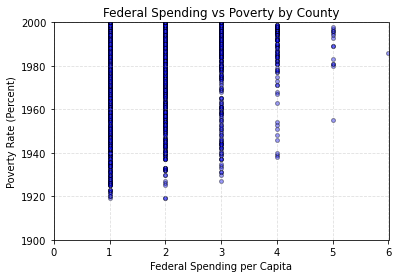

In [10]:
# Observar la relació entre les variables "fed_spend" i "poverty"
x = movies2.n_generes
y = movies2.year

# Plot
plt.axis([0, 6, 1900, 2000])
colors = 'Blue' #color dels marcadors
area = np.pi*5 #mida dels marcadors
a = 0.4 #opacitat dels marcadors; per poder veure la superposició/densitat dels punts
plt.scatter(x, y, s=area, c=colors, alpha=a, edgecolors='black')
plt.grid(linestyle='--',alpha = 0.4)

plt.title('Federal Spending vs Poverty by County')
plt.xlabel('Federal Spending per Capita')
plt.ylabel('Poverty Rate (Percent)')
plt.show()

### <span style=color:darkblue>1.3. MATRIX PLOT</span>

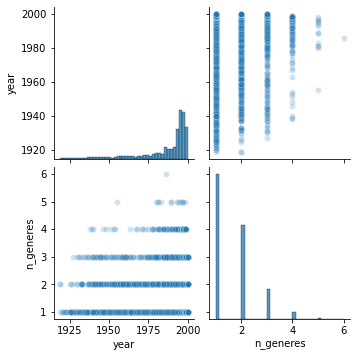

In [11]:
# Matrix Plot: en aquest cas només hi ha dues variables numèriques
sns.pairplot(movies2, diag_kind='hist', plot_kws={'alpha': 0.2})

Text(0.5, 1.0, '')

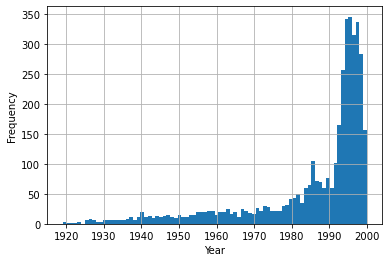

In [12]:
movies2.hist(['year'], bins=2000-1919+1)#posem una caixa per any
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('')

Text(0.5, 1.0, '')

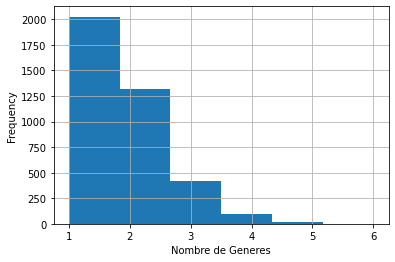

In [13]:
movies2.hist(['n_generes'], bins=6)
plt.ylabel('Frequency')
plt.xlabel('Nombre de Generes')
plt.title('')

En aquest cas té més sentit generear els histogrames per separat.

### <span style=color:darkblue>1.4. HISTOGRAMES I GRÀFICS DE CAIXA</span>

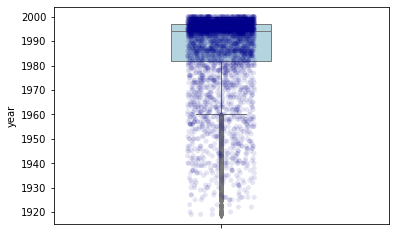

In [14]:
import seaborn as sns
ax1 = sns.boxplot(y = 'year', data = movies2, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax1 = sns.stripplot(y=movies2['year'], orient='v', color='darkblue', alpha=0.1)

In [15]:
movies2['year'].describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: year, dtype: float64

Amb l'histograma anterior ja s'intuia que la majoria de pel·lícules del data set es concentraven en la dècada dels 90, però amb el box plot es pot detallar millor aquesta observació:
 - Els anys 1997-2000 concentren el 25% de les pel·lícules.
 - Entre el 1994 i el 1997 hi ha un altre 25% dels films.
 - La dècada dels 80 és la segons més prolífica: entre el 1982 i el 1994 hi ha u altre 25% de les dades
 - El 25% restant es reparteix entre els anys 1919 i 1982 (63 anys).

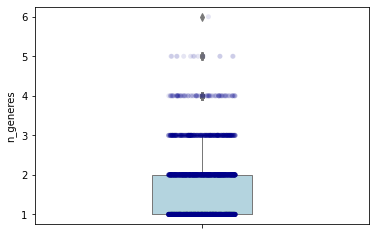

In [16]:
ax2 = sns.boxplot(y = 'n_generes', data = movies2, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);
ax2 = sns.stripplot(y=movies2['n_generes'], orient='v', color='darkblue', alpha=0.1)

In [17]:
movies2['n_generes'].describe()

count    3883.000000
mean        1.650270
std         0.804589
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: n_generes, dtype: float64

Aquest cas és singular ja que min = Q1 = Q2. De fet, es pot comprovar quantes pel·lícules hi ha per nombre de categories:

In [19]:
movies2.groupby(['n_generes']).count()

,film,year,genere
n_generes,,,
1,2025,2025,2025
2,1322,1322,1322
3,421,421,421
4,100,100,100
5,14,14,14
6,1,1,1


## <span style=color:darkblue>2. ESTADÍSTICA DESCRIPTIVA</span>
### <span style=color:darkblue>2.1. MITJANA (_Mean, Average_)</span>

The <span style=color:blue><b>mean</b></span>, sometimes called the <span style=color:blue><b>average</b></span>, is a common way to measure the <span style=color:blue><b>center of a distribution of data</b></span>.

* The <span style=color:blue><b>sample mean</b></span> is often labeled <span style=color:blue><b>$\bar{x}$</b></span>.

* The <span style=color:blue><b><u>Population mean</u></b></span> has a special label :  <span style=color:blue>$\mu$</span>. 
$%$   The symbol <span style=color:blue>$\mu$</span> is the $Greek$ letter <span style=color:blue>$mu$</span> and represents the <span style=color:blue>average/mean of all observations in the <b>Population</b></span>.   
Sometimes a subscript, such as <span style=color:blue><b>$_x$</b></span>, is used to represent which variable the <span style=color:blue><b>population mean</b></span> refers to, e.g. <span style=color:blue><b>$\mu_x$</b></span>
</div>

\begin{align*}\bar{x}\:=\:\frac{x_1\:+\:x_2\:+\:· · ·\:+\:x_n}{n}\end{align*}   

<span style=color:red><b><u>EXERCISE - 3.1</u></b></span> 

* What does $x_1$ correspond to ?,   
* and **$x_2$** ?   
* Can you infer a general meaning to what $x_i$ might represent?
* What was $n$ in this sample (county)?

<span style=color:green><b><u>SOLUTION - 3.1</u></b></span> 

In [20]:
# si es continua utilitzant la variable "year":
print('x1 = ',movies2['year'][0])
print('x2 = ',movies2['year'][1])
print('en general: xi = ',"movies2['year'][i-1]")
print('n = ',movies2['year'].size)

x1 =  1995
x2 =  1995
en general: xi =  movies2['year'][i-1]
n =  3883


### <span style=color:darkblue>2.2. VARIÀNCIA</span>

The <span style=color:blue><b>mean</b></span> was introduced as a method to describe the <span style=color:blue>center of a data set</span>, but the <span style=color:blue><b><u>variability in the data</u></b></span> is also <b>important</b>. We introduce <span style=color:blue><b><u>two measures of variability</u></b></span>: 

 * the <span style=color:blue><b><u>Variance</u></b></span>. It is roughly the <span style=color:blue>average squared distance</span> from the <b>mean</b>.
 
 * and the <span style=color:blue><b><u>Standard Deviation</u></b></span>. The <b>Standard Deviation</b> is defined as the <b>square root</b> of the <span style=color:blue><b>Variance</b></span>. is useful when considering how close the data are to the <b>Mean</b>.   

The <span style=color:blue><b>Standard Deviation</b></span> describes <b>how far away</b> the typical <b>observation</b> is from the <span style=color:blue>mean</span>. We call the <span style=color:blue><em>distance of an observation from its mean</em></span> its <span style=color:blue><b><u>Deviation</u></b></span>. 

\begin{align*}D_i = x_i\:−\:\bar{x}\end{align*}

- sample variance</b></span>, denoted by <span style=color:blue><b>$s^2$</b></span>. 
</div>

\begin{align*}s^2\:=\:\frac{(x_1\:−\:\bar{x})^2 + (x_2\:−\:\bar{x})^2 +  · · · + (x_n\:−\:\bar{x})^2}{n − 1}\end{align*}

- sample deviation</b></span>, denoted by <span style=color:blue><b>$s$</b></span>. 
</div>  
  
\begin{align*}s = \sqrt{s^2}\end{align*}   

Formulas and methods used to compute the <b>Variance</b> and <b>Standard Deviation</b> for a <b>Population</b> are similar to those used for a <b>sample</b><i> (The only difference is that the <b>Population Variance</b> has a division by $n$ instead of $n - 1$ )</i>.   
Like the <b>Mean</b>, the <b>Population</b> values have special symbols : 
- population variance </b></span>, denoted by <span style=color:blue><b>$\sigma^2$</b></span>.

\begin{align*}\sigma^2\:=\:\frac{(x_1\:−\:\bar{x})^2 + (x_2\:−\:\bar{x})^2 +  · · · + (x_n\:−\:\bar{x})^2}{n}\end{align*}

- population standard deviation </b></span>, denoted by <span style=color:blue><b>$\sigma$</b></span>.

\begin{align*}\sigma = \sqrt{\sigma^2}\end{align*}   

In [21]:
year_std = movies2.year.std() #desviació estàndard de la variable "income"
year_std

16.895690157525298

In [22]:
year_var = movies2.year.var() #variància de la variable "income"
year_var

285.4643458990972

In [23]:
np.sqrt(movies2.year.var()) #càlcul indirecte de la variància de la variable "income"

16.895690157525298

### <span style=color:darkBLUE>2.3. DESVIACIÓ ESTÀNDARD</span>

<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Describe the <b>distribution</b> of the a variable using an histogram. 
The description should incorporate the center, variability, and shape of the distribution, and it should also be placed in context. Also note any especially unusual cases.

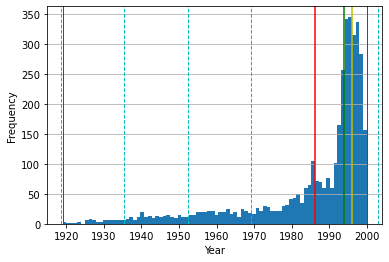

In [26]:
movies2.hist(['year'], bins=2000-1919+1)
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('')
plt.grid(axis='x')
year_mean = movies2['year'].mean()
for n in range(-1,5):
    if n == 0:
        plt.axvline(year_mean, color='r', linewidth=1.5);
    else:
        plt.axvline(year_mean-n*year_std, color='c', linestyle='dashed', linewidth=1);
plt.axvline(movies2['year'].min(), color='r',linewidth=1);
plt.axvline(movies2['year'].max(), color='r',linewidth=1);
moda = movies2['year'].mode()
for m in moda:
    plt.axvline(m, color='y', linewidth=1.5);
plt.axvline(movies2['year'].median(), color='g',linewidth=1.5);

In [29]:
year_mean

1986.0669585372134

In [30]:
movies2['year'].mode()

0    1996
dtype: int64

In [34]:
print('Min =', movies2['year'].min(),'\nModa 1 =', moda, '\nMitjana = ', round(year_mean),'\nMax =', movies2['year'].max())

Min = 1919 
Moda 1 = 0    1996
dtype: int64 
Mitjana =  1986 
Max = 2000


La distribució de l'any de la pel·lícula és unimodal i té asimetria a la dreta, sent-ne la mitjana l'any 1986. La desviació estàndard és de 285.46, relativament alta.
El punt més allunyat es troba a l'any 2000, a menys d'1 sigma de la mitjana. Per la banda contrària, el valor mínim es troba al límit de -4 sigma. 

### <span style=color:darkBLUE>2.4. BOX PLOTS</span>

A <span style=color:blue>Box Plot</span> summarizes a dataset using <span style=color:blue><b><i>five statistics</i></b></span> while also plotting <span style=color:blue>unusual observations - <b>Anomalies or Outliers</b></span>.

### <span style=color:darkred>Quartiles, and the Median</span>

Ja s'ha realitzat anteriorment l'estudi de quartils.

<span style=color:red><b><u>EXERCISE - 3.8</u></b></span> 

1. What percent of the data fall between Q1 and the median?
2. What percent is between the median and Q3?

<div class="alert alert-block alert-info"><font size="3"><b>Visualització gràfica de Múltiples variables amb el data set county.txt</u></b></center></font>

<span style=color:darkBLUE>**Exercici 3**: </span>
Mostreu la vostra creativitat. Què creieu rellevant mostrar del dataset "movies.dat" del exercici anterior? Feu una o dues representacions gràfiques i justifiqueu la seva elecció.

### <span style=color:darkBLUE>3.1. CATEGORIES</span>

El primer que es pot afegir sobre l'exercici anterior és treballar en les **categories**:

In [42]:
llista_cat = [] #vull saber quines categories de pel·lícula es poden trobar a la variable "genere"
for register in movies2["genere"]:
    for cat in register:
        if not(cat in llista_cat):
            llista_cat.append(cat)
llista_cat

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

In [56]:
len(llista_cat) # en total n'hi ha:

18

<span style=color:darkBLUE>**Pot ser interessant observar:**</span>
- Si algun genere ha crescut o minvat en popularitat al llarg dels anys
- Si s'ha tornat més difícil categoritzar les pel·lícules, és a dir, si el nombre de categories atribuides a cada pel·lícula ha augmentat amb els anys o no

In [175]:
# Per fer això, primer caldria crear una variable per cada categoria i, 
# segon, afegiria una variable per la dècada, ja que facilitarà veure els resultats

for cat in llista_cat:
    recompte = []
    for register in movies2["genere"]:
        if cat in register:
            recompte.append(1)
        else:
            recompte.append(0)
    movies2[cat] = pd.Series(recompte)
        
def calcul_decada(x):
    n = int((x-1900)/10)*10 + 1900
    return n
movies2["decada"] = movies2["year"].apply(calcul_decada)

In [176]:
movies2[1055:1061] #vegem com queda

,film,year,genere,n_generes,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,decada
1055,"Murder, My Sweet",1944,"[Film-Noir, Thriller]",2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1940
1056,Macao,1952,[Adventure],1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1950
1057,For the Moment,1994,"[Romance, War]",2,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1990
1058,Willy Wonka and the Chocolate Factory,1971,"[Adventure, Children's, Comedy, Fantasy]",4,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1970
1059,"Sexual Life of the Belgians, The",1994,[Comedy],1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
1060,"Innocents, The",1961,[Thriller],1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1960


In [244]:
#creo un df amb les dècades i el recompte de pel·lícules de cada categoria de gènere que els corresponen
decada_genere = pd.DataFrame()

for cat in llista_cat:
    #print(cat)
    s = movies2[[cat,"decada"]].groupby("decada").sum()[cat]
    s = pd.Series(s).transpose()
    decada_genere[cat] = s

decada_genere

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
decada,,,,,,,,,,,,,,,,,,
1910,0,0,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0
1920,0,0,13,1,0,2,14,1,1,2,1,1,0,2,1,0,0,0
1930,2,4,23,6,0,15,26,3,4,9,7,1,1,5,11,5,1,1
1940,11,13,22,6,0,14,44,2,8,17,14,1,0,11,14,9,17,7
1950,5,10,25,13,4,18,62,10,7,16,20,32,1,13,17,7,9,7
1960,5,20,41,16,2,10,69,17,6,24,26,13,1,13,19,5,2,16
1970,8,25,63,26,4,8,84,41,17,22,35,31,2,11,9,6,1,15
1980,14,31,200,78,24,54,211,110,21,55,112,66,9,31,12,12,4,3
1990,52,139,743,130,33,333,1036,299,139,322,120,121,105,55,30,61,10,19


In [245]:
round(decada_genere.describe())

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,10.0,25.0,120.0,28.0,7.0,47.0,160.0,50.0,21.0,49.0,34.0,28.0,13.0,14.0,11.0,11.0,4.0,7.0
std,15.0,41.0,226.0,42.0,12.0,102.0,313.0,93.0,42.0,97.0,44.0,39.0,33.0,17.0,9.0,18.0,6.0,7.0
min,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,5.0,22.0,6.0,0.0,8.0,30.0,2.0,4.0,11.0,7.0,1.0,0.0,3.0,3.0,2.0,0.0,0.0
50%,6.0,12.0,33.0,10.0,2.0,14.0,58.0,14.0,8.0,20.0,17.0,12.0,1.0,11.0,12.0,6.0,2.0,5.0
75%,10.0,24.0,68.0,24.0,4.0,18.0,80.0,36.0,15.0,25.0,33.0,32.0,6.0,13.0,16.0,8.0,8.0,13.0
max,52.0,139.0,743.0,130.0,33.0,333.0,1036.0,299.0,139.0,322.0,120.0,121.0,105.0,55.0,30.0,61.0,17.0,19.0


In [246]:
decada_genere

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
decada,,,,,,,,,,,,,,,,,,
1910,0,0,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0
1920,0,0,13,1,0,2,14,1,1,2,1,1,0,2,1,0,0,0
1930,2,4,23,6,0,15,26,3,4,9,7,1,1,5,11,5,1,1
1940,11,13,22,6,0,14,44,2,8,17,14,1,0,11,14,9,17,7
1950,5,10,25,13,4,18,62,10,7,16,20,32,1,13,17,7,9,7
1960,5,20,41,16,2,10,69,17,6,24,26,13,1,13,19,5,2,16
1970,8,25,63,26,4,8,84,41,17,22,35,31,2,11,9,6,1,15
1980,14,31,200,78,24,54,211,110,21,55,112,66,9,31,12,12,4,3
1990,52,139,743,130,33,333,1036,299,139,322,120,121,105,55,30,61,10,19


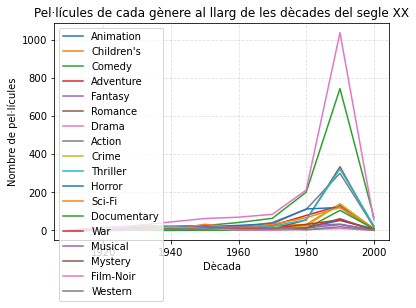

In [247]:
# Plot
#plt.axis([1910, 2000, 0, 60])
x = decada_genere.index
for col in decada_genere.columns:
    y = decada_genere[col]
    plt.plot(x, y, linestyle='solid',label=col)
plt.grid(linestyle='--',alpha = 0.4)

plt.title('Pel·lícules de cada gènere al llarg de les dècades del segle XX')
plt.xlabel('Dècada')
plt.ylabel('Nombre de pel·lícules')
plt.legend(loc='upper left')
plt.show()

Com que, tal com s'ha vist anteriorment, hi ha moltes més pel·lícules als anys 90 que a la resta de dècades, el gràfic queda una mica desvirtuat. La cosa millora si es canvien els valors unitaris per **percentatges**:

In [265]:
# Nou df amb %, enlloc de valors unitaris:
decada_genere2 = decada_genere.copy(deep=True) #deep=True pq no vull que es copiin recursivament, només vull mantenir el df original
decada_genere2["total"] = pd.Series(decada_genere.sum(axis=1)) #sumar els valors per fila, els totals de cada dècada
for col in decada_genere2.columns:
    decada_genere2[col] = (decada_genere2[col]/decada_genere2["total"])*100
decada_genere2

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,total
decada,,,,,,,,,,,,,,,,,,,
1910,0.000000,0.000000,20.000000,20.000000,0.000000,0.000000,40.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1920,0.000000,0.000000,33.333333,2.564103,0.000000,5.128205,35.897436,2.564103,2.564103,5.128205,2.564103,2.564103,0.000000,5.128205,2.564103,0.000000,0.000000,0.000000,100.0
1930,1.612903,3.225806,18.548387,4.838710,0.000000,12.096774,20.967742,2.419355,3.225806,7.258065,5.645161,0.806452,0.806452,4.032258,8.870968,4.032258,0.806452,0.806452,100.0
1940,5.238095,6.190476,10.476190,2.857143,0.000000,6.666667,20.952381,0.952381,3.809524,8.095238,6.666667,0.476190,0.000000,5.238095,6.666667,4.285714,8.095238,3.333333,100.0
1950,1.811594,3.623188,9.057971,4.710145,1.449275,6.521739,22.463768,3.623188,2.536232,5.797101,7.246377,11.594203,0.362319,4.710145,6.159420,2.536232,3.260870,2.536232,100.0
1960,1.639344,6.557377,13.442623,5.245902,0.655738,3.278689,22.622951,5.573770,1.967213,7.868852,8.524590,4.262295,0.327869,4.262295,6.229508,1.639344,0.655738,5.245902,100.0
1970,1.960784,6.127451,15.441176,6.372549,0.980392,1.960784,20.588235,10.049020,4.166667,5.392157,8.578431,7.598039,0.490196,2.696078,2.205882,1.470588,0.245098,3.676471,100.0
1980,1.337154,2.960840,19.102197,7.449857,2.292264,5.157593,20.152818,10.506208,2.005731,5.253104,10.697230,6.303725,0.859599,2.960840,1.146132,1.146132,0.382044,0.286533,100.0
1990,1.387777,3.709634,19.829197,3.469442,0.880705,8.887110,27.648786,7.979717,3.709634,8.593541,3.202562,3.229250,2.802242,1.467841,0.800641,1.627969,0.266880,0.507072,100.0


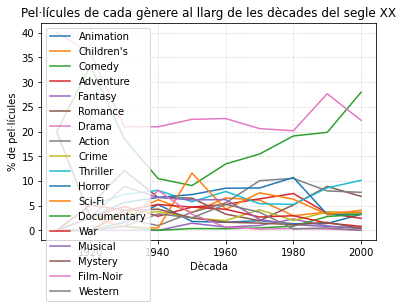

In [271]:
decada_genere2 = decada_genere2.drop("total", axis=1)#no volem que surti el total (100%) al gràfic
x = decada_genere2.index
for col in decada_genere2.columns:
    y = decada_genere2[col]
    plt.plot(x, y, linestyle='solid',label=col)
plt.grid(linestyle='--',alpha = 0.4)

plt.title('Pel·lícules de cada gènere al llarg de les dècades del segle XX')
plt.xlabel('Dècada')
plt.ylabel('% de pel·lícules')
plt.legend(loc='upper left')
plt.show()

**Aquest gràfic és doncs el primer amb el que em quedaria.**

S'observa que el gènere de _Drama_ ha estat sempre el predominant, mantenint sempre >20% de les pel·lícules realitzades. El gènere de _Comèdia_ ha estat el segon més popular en gairebé totes les dècades, tot i que amb menys constància pel que fa al rati i, fins i tot, veient-se superat per la _Ciència Ficció_ en la dècada dels 50s.

Altres gèneres que han destacat puntualment són: l'_Acció_, als 10s; el _Romàntic_, als 30s; i el _Thriller_, al 2000. Aquest últim s'ha mantingut entre el 5 i el 10% des dels anys 20s. També es pot mencionar el cinema d'_Acció_, que va tenir unacrescuda important des dels anys 60s en endavant, i la temàtica d'_Horror_, que també va tenir un increment sostingut des de principis de segle, però es va acabar desplomant als 90s.

En definitiva, aquesta nova ordenació de les dades i la respectiva visualització gràfica, permet treure molta informació de les dades.

### <span style=color:darkBLUE>3.2. PEL·LÍCULES REPETIDES</span>

Anteriorment s'ha observat que hi ha **pel·lícules repetides** (In[9]). Vegem quines són:

In [55]:
repetides = movies2.groupby(["film"]).count().sort_values(by = 'year',ascending = False)
repetides[repetides["year"]>1]["year"]

film
Hamlet                                        5
Mummy, The                                    3
Shaft                                         2
Sabrina                                       2
Fly, The                                      2
King and I, The                               2
King Kong                                     2
End of the Affair, The                        2
Parent Trap, The                              2
Titanic                                       2
Dracula                                       2
Wonderland                                    2
Nutty Professor, The                          2
Godzilla (Gojira)                             2
Psycho                                        2
General, The                                  2
True Crime                                    2
Man Who Knew Too Much, The                    2
Haunting, The                                 2
Kid, The                                      2
Get Carter                         

<span style=color:darkBLUE>**Aquí podria ser interessant veure:**</span>
- Quants anys s'ha trigat a repetir aquestes pel·lícules, i també veure 
- Si hi ha diferències entre el grup de pel·lícules repetides i les úniques

<span style=color:RED>**No trec més gràfics perquè ja m'he estès suficientment.**</span>